<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

cov = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
top10_inf=cov.sort_values('5/1/20',ascending=False)[1:10]
top10_inf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,...,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024,202990,205905,207634,209465,210773,212917,213435,213435
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,...,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973,192994,195351,197675,199414,201505,203591,205463,207428
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,...,6650,8077,9529,11658,14543,17089,19522,22141,25150,29474,33718,38168,41903,47806,51608,55242,60733,65077,73758,78991,84279,88621,93873,98476,103093,108692,114217,120067,124743,129044,133495,138078,143464,148377,152840,157149,161145,165221,171253,177454
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,...,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,68605,70478,74390,78167,82048,86334,90676,93790,120633,124298,129257,132473,144944,146923,146906,151808,154188,156921,154715,157026,158636,160292,160847,164589,167605,165093,165764,165764
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,...,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129,154999,156513,157770,158758,159912,161539,163009,164077
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546,82329,86306,90980,95591,98674,101790,104912,107773,110130,112261,114653,117589,120204,122392
187,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,438,495,658,840,1036,1264,1534,1836,2337,2777,3548,4149,4731,5389,6343,7497,8672,10131,11917,13584,15770,18328,21102,24490,27938,32008,36793,42853,47121,52763,57999,62773,68622,74588,80949,87147,93558,99399,106498,114431
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,...,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494,80868,82211,83505,84802,85996,87026,88194,89328,90481,91472,92584,93657,94640,95646
28,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202


In [0]:
top10.set_index(top10['Country/Region'], inplace=True)
top10

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Spain,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,...,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024,202990,205905,207634,209465,210773,212917,213435,213435
Italy,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,...,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973,192994,195351,197675,199414,201505,203591,205463,207428
United Kingdom,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,...,6650,8077,9529,11658,14543,17089,19522,22141,25150,29474,33718,38168,41903,47806,51608,55242,60733,65077,73758,78991,84279,88621,93873,98476,103093,108692,114217,120067,124743,129044,133495,138078,143464,148377,152840,157149,161145,165221,171253,177454
France,NaN,France,46.2276,2.2137,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,...,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,68605,70478,74390,78167,82048,86334,90676,93790,120633,124298,129257,132473,144944,146923,146906,151808,154188,156921,154715,157026,158636,160292,160847,164589,167605,165093,165764,165764
Germany,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,...,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129,154999,156513,157770,158758,159912,161539,163009,164077
Turkey,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546,82329,86306,90980,95591,98674,101790,104912,107773,110130,112261,114653,117589,120204,122392
Russia,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,438,495,658,840,1036,1264,1534,1836,2337,2777,3548,4149,4731,5389,6343,7497,8672,10131,11917,13584,15770,18328,21102,24490,27938,32008,36793,42853,47121,52763,57999,62773,68622,74588,80949,87147,93558,99399,106498,114431
Iran,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,...,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494,80868,82211,83505,84802,85996,87026,88194,89328,90481,91472,92584,93657,94640,95646
Brazil,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757,50036

In [0]:
top10=top10.iloc[:,4:]
top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,...,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024,202990,205905,207634,209465,210773,212917,213435,213435
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,...,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973,192994,195351,197675,199414,201505,203591,205463,207428
United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,...,6650,8077,9529,11658,14543,17089,19522,22141,25150,29474,33718,38168,41903,47806,51608,55242,60733,65077,73758,78991,84279,88621,93873,98476,103093,108692,114217,120067,124743,129044,133495,138078,143464,148377,152840,157149,161145,165221,171253,177454
France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,...,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,68605,70478,74390,78167,82048,86334,90676,93790,120633,124298,129257,132473,144944,146923,146906,151808,154188,156921,154715,157026,158636,160292,160847,164589,167605,165093,165764,165764
Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,...,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129,154999,156513,157770,158758,159912,161539,163009,164077
Turkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546,82329,86306,90980,95591,98674,101790,104912,107773,110130,112261,114653,117589,120204,122392
Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,438,495,658,840,1036,1264,1534,1836,2337,2777,3548,4149,4731,5389,6343,7497,8672,10131,11917,13584,15770,18328,21102,24490,27938,32008,36793,42853,47121,52763,57999,62773,68622,74588,80949,87147,93558,99399,106498,114431
Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,...,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494,80868,82211,83505,84802,85996,87026,88194,89328,90481,91472,92584,93657,94640,95646
Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,...,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202


In [0]:
top10 = top10.transpose()
top10

Country/Region,Spain,Italy,United Kingdom,France,Germany,Turkey,Russia,Iran,Brazil
1/22/20,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,3,0,0,0,0,0
1/26/20,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4/27/20,209465,199414,157149,164589,158758,112261,87147,91472,67446
4/28/20,210773,201505,161145,167605,159912,114653,93558,92584,73235
4/29/20,212917,203591,165221,165093,161539,117589,99399,93657,79685
4/30/20,213435,205463,171253,165764,163009,120204,106498,94640,87187


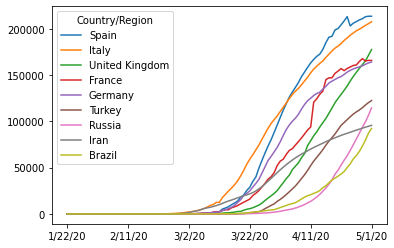

In [0]:
top10.plot()

In [0]:
bra = top10[top10['Brazil']>100]['Brazil']
bra.values

array([  151,   151,   162,   200,   321,   372,   621,   793,  1021,
        1546,  1924,  2247,  2554,  2985,  3417,  3904,  4256,  4579,
        5717,  6836,  8044,  9056, 10360, 11130, 12161, 14034, 16170,
       18092, 19638, 20727, 22192, 23430, 25262, 28320, 30425, 33682,
       36658, 38654, 40743, 43079, 45757, 50036, 54043, 59324, 63100,
       67446, 73235, 79685, 87187, 92202])

In [0]:
topdez = pd.DataFrame()

for pais in top10.columns:
  topPais=top10[top10[pais]>100][pais]
  dfPais =  pd.DataFrame({pais:topPais.values})
  topdez = pd.concat([ topdez , dfPais ], ignore_index=True,axis=1)
 
topdez.columns = top10.columns
topdez

Country/Region,Spain,Italy,United Kingdom,France,Germany,Turkey,Russia,Iran,Brazil
0,120.0,155,115.0,130.0,130.0,192.0,114.0,139.0,151.0
1,165.0,229,163.0,191.0,159.0,359.0,147.0,245.0,151.0
2,222.0,322,206.0,204.0,196.0,670.0,199.0,388.0,162.0
3,259.0,453,273.0,285.0,262.0,1236.0,253.0,593.0,200.0
4,400.0,655,321.0,377.0,482.0,1529.0,306.0,978.0,321.0
...,...,...,...,...,...,...,...,...,...
64,NaN,199414,NaN,NaN,NaN,NaN,NaN,94640.0,NaN
65,NaN,201505,NaN,NaN,NaN,NaN,NaN,95646.0,NaN
66,NaN,203591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,205463,NaN,NaN,NaN,NaN,NaN,NaN,NaN


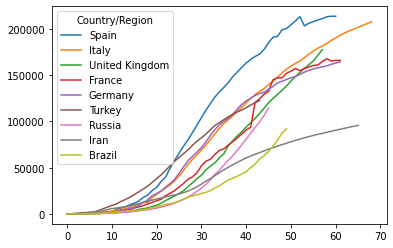

In [0]:
topdez.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


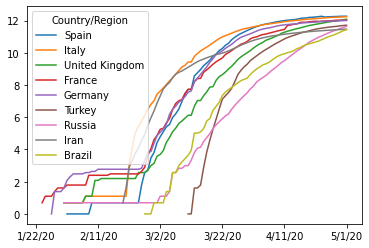

In [0]:
from numpy import log
log_top = log(top10)
log_top.plot()